In [26]:
import pandas as pd                                  # pandas to work with DF
from sklearn.model_selection import train_test_split # to split data into train and test sets
from sklearn.preprocessing import PolynomialFeatures # i tried to add to X Poly features, but it didn't work
from sklearn.metrics import accuracy_score           # to score our model
from sklearn.ensemble import RandomForestClassifier  # i found that RandomForest makes not bad predictions
from matplotlib import pyplot as plt
%matplotlib inline

In [27]:
df = pd.read_csv('train.csv')     # reading csv file to DataFrame
df1 = df[:5000]                   # to test our hypothesis faster
y = df['y']                       # get y(label) from df
X = df.drop('y',axis=1)           # get train data without labelss
test_df = pd.read_csv('test.csv') # get test data

In [28]:
for item in X.columns: # this loop for filling column that have type = object with most frequent values
    if X[item].dtype == object:
        modval = X[item].mode().values
        strmodval = ''.join(str(a) for a in modval)
        X[item] = X[item].fillna(strmodval)

In [29]:
for item in X.columns: # this loop for filling column that have type = object with mean values
    if X[item].dtype == 'float64':
        X[item] = X[item].fillna(X[item].mean())

In [30]:
for item in X.columns: # this loop is converting unreadeable strings into int values for further training model
    if X[item].dtype == object:
        my_dict = dict(enumerate(X[item].unique())) 
        my_dict1 = dict((y,x) for x, y in my_dict.items())
        X[item] = X[item].map(my_dict1)


/home/ymka/.local/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


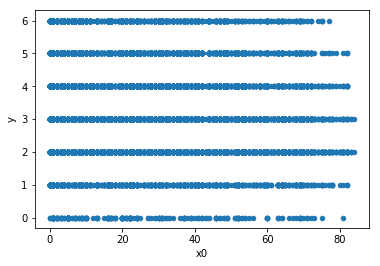

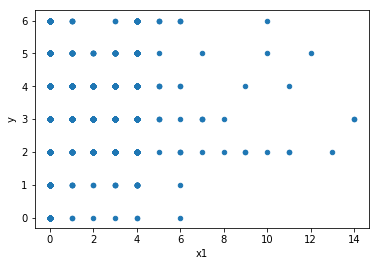

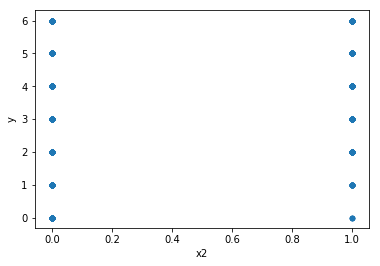

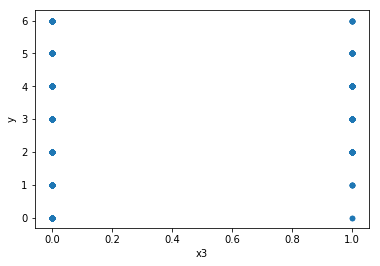

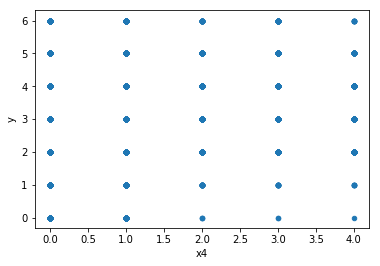

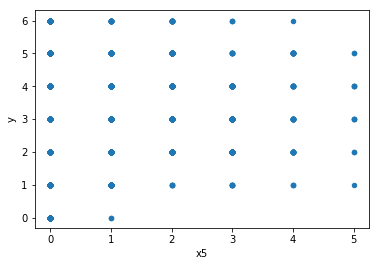

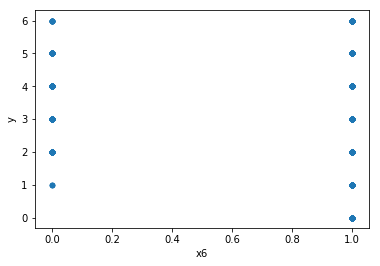

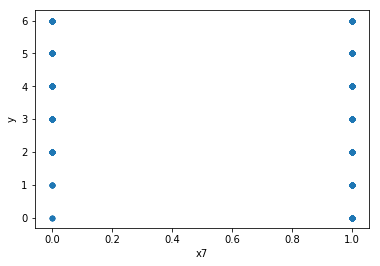

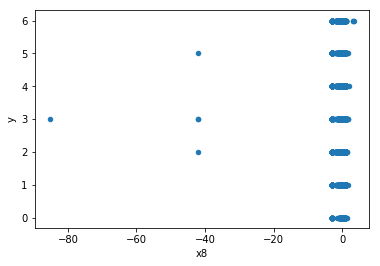

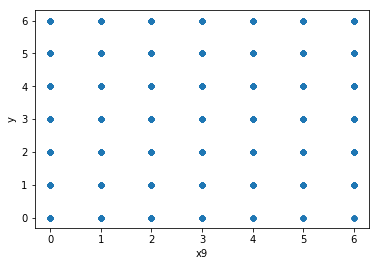

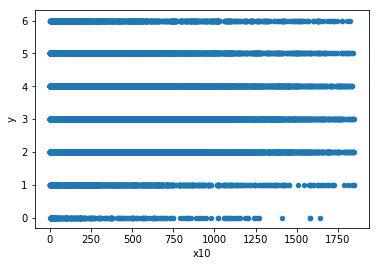

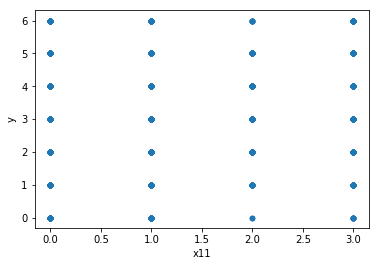

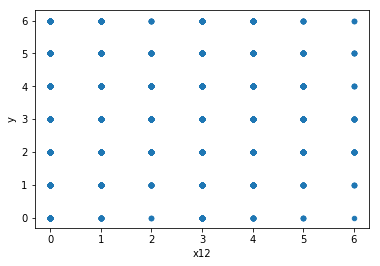

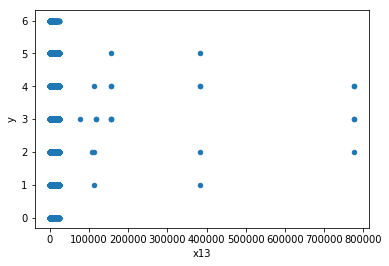

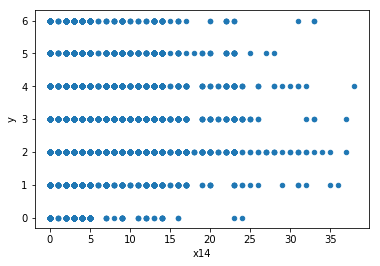

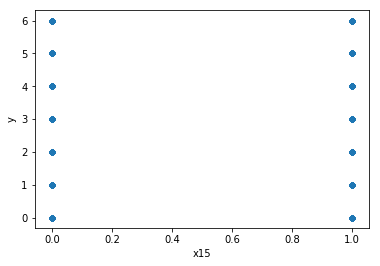

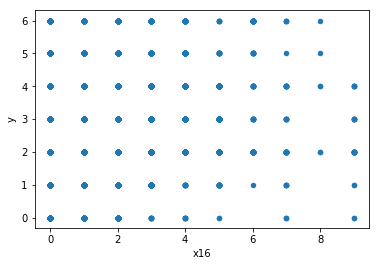

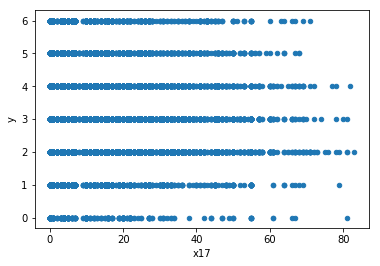

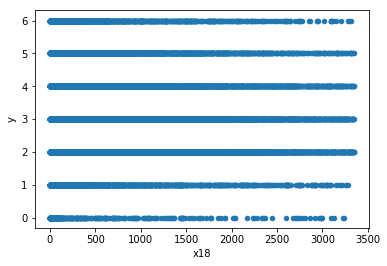

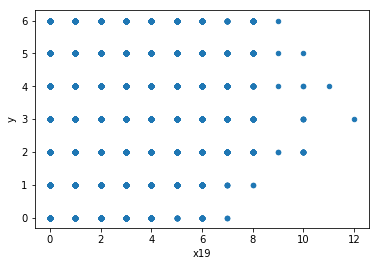

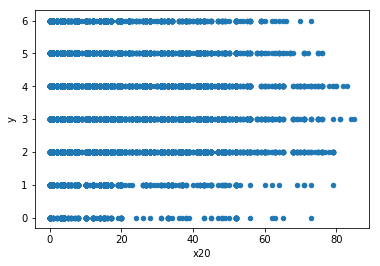

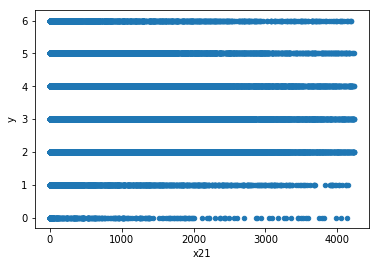

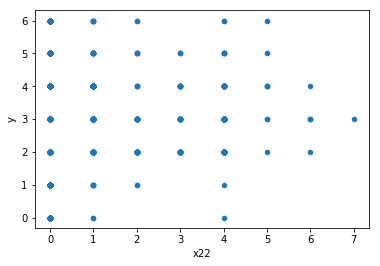

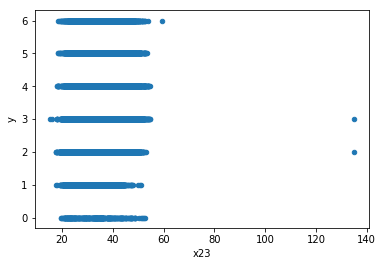

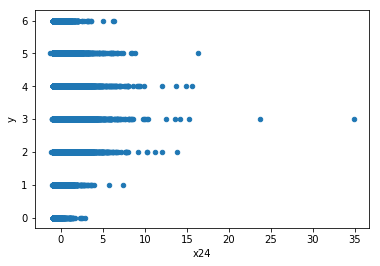

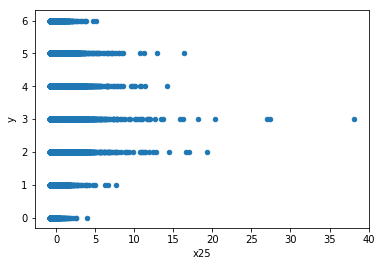

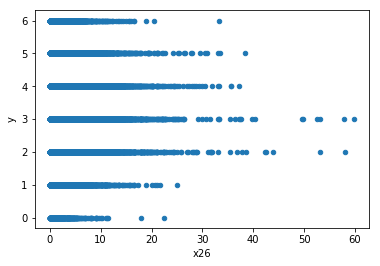

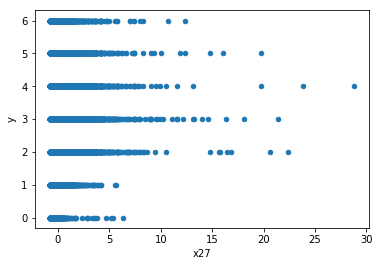

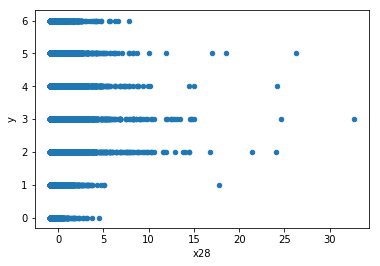

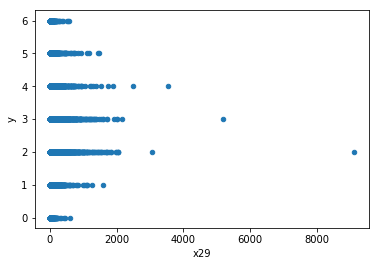

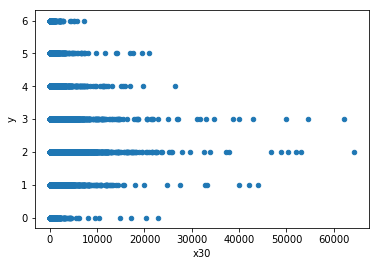

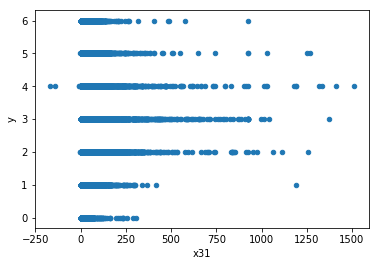

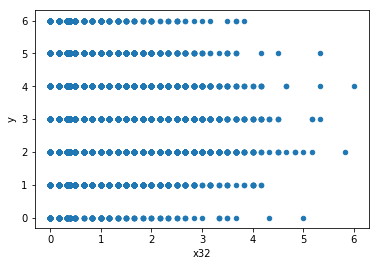

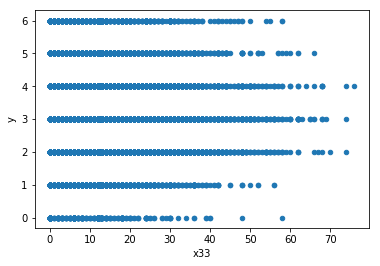

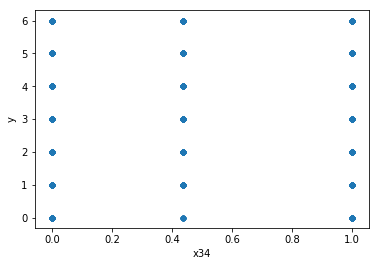

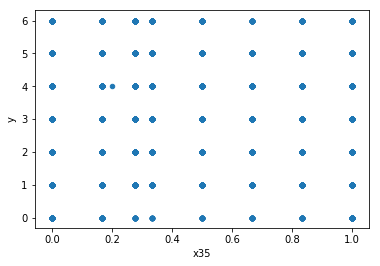

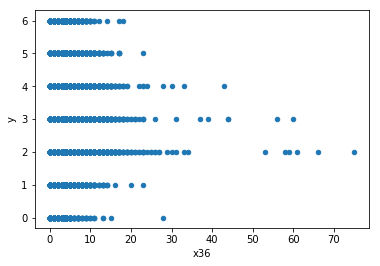

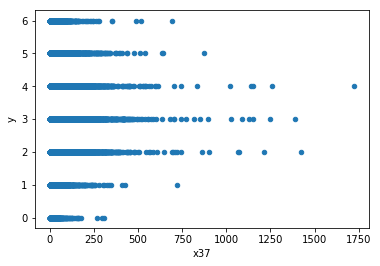

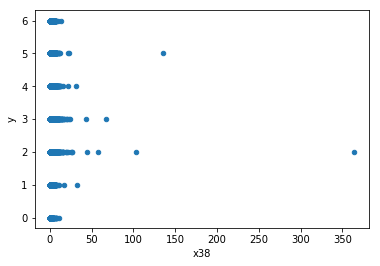

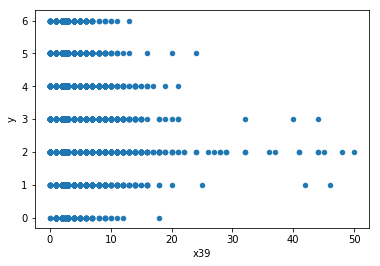

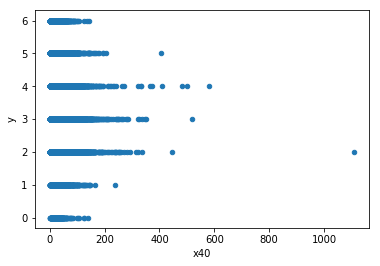

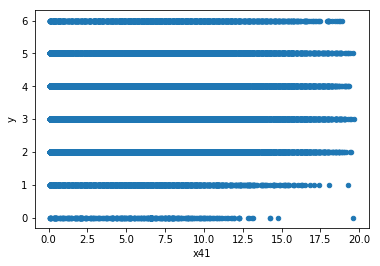

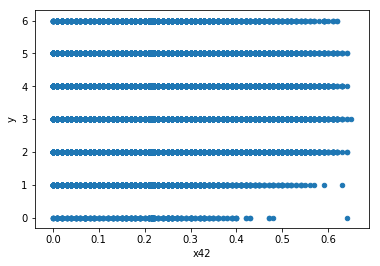

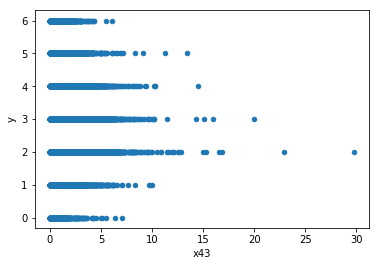

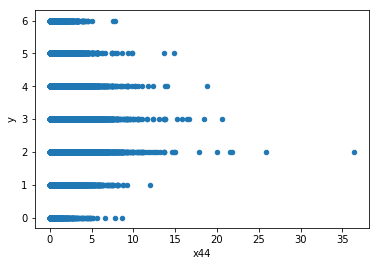

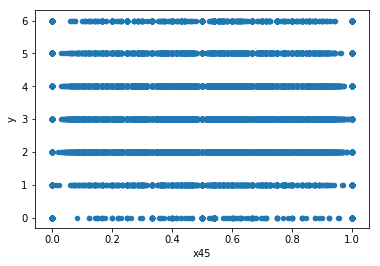

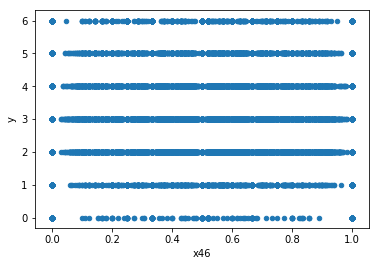

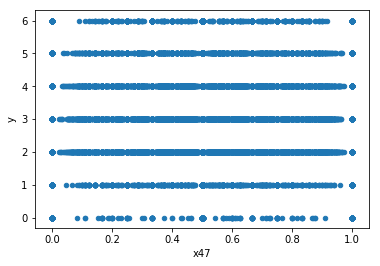

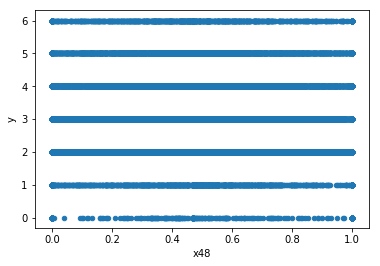

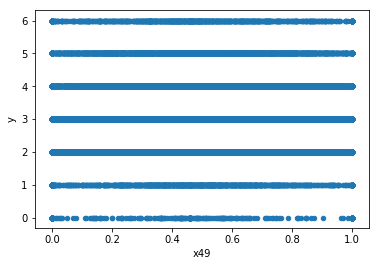

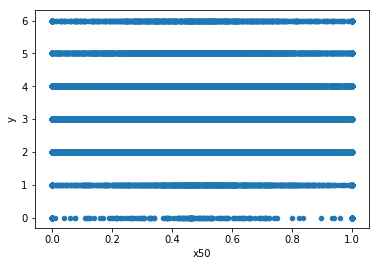

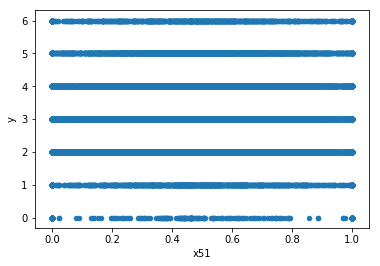

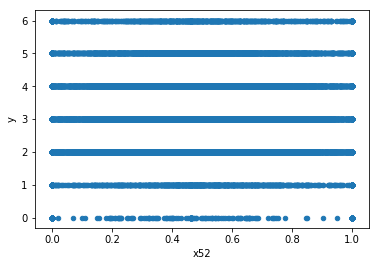

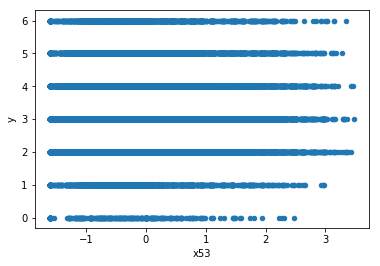

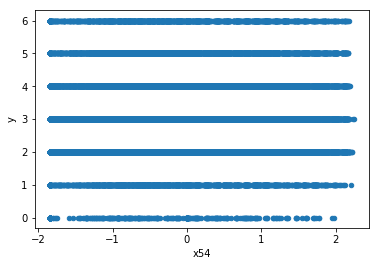

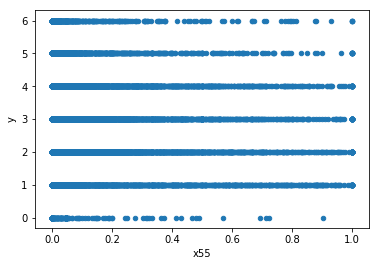

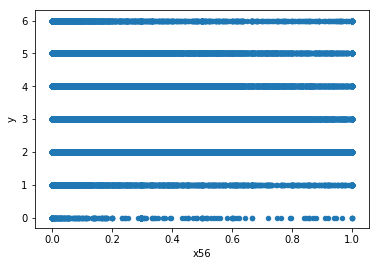

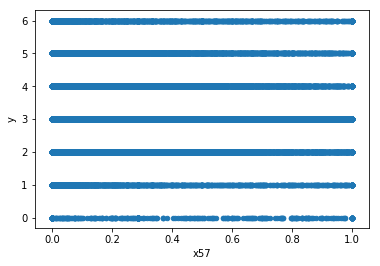

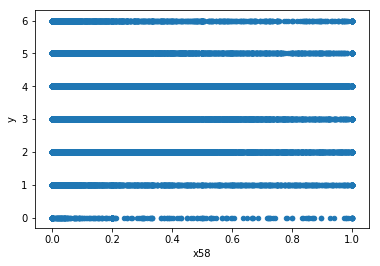

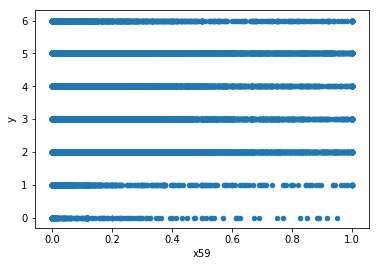

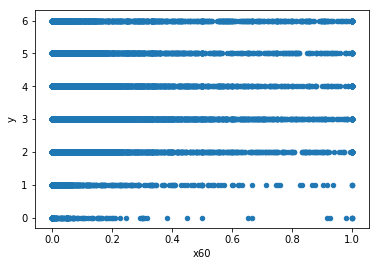

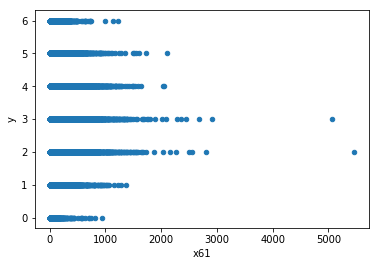

In [6]:
X['y'] = y # to get info about our dataset
for idx, feature in enumerate(X.columns[:-1]):
    X.plot(feature, 'y', subplots=True, kind = 'scatter')

In [31]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.1) # spliting data into train and test

In [32]:
clf = RandomForestClassifier(n_estimators=50, max_depth=30, max_features=15) #training and scoring our model
clf.fit(x_train, y_train)
y_pred =  clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.7426

In [33]:
a = pd.read_csv('sol.csv') # to check correct test df

In [34]:
id_ = test_df['ID'] # to test our model, with id we can't test, later we will concat id and y
test_df.drop('ID', inplace=True, axis=1) 

In [35]:
for item in test_df.columns: # this loop for filling column that have type = object with most frequent values
    if test_df[item].dtype == object:
        modval = test_df[item].mode().values
        strmodval = ''.join(str(a) for a in modval)
        test_df[item] = test_df[item].fillna(strmodval)

In [36]:
for item in test_df.columns: # this loop for filling column that have type = object with mean values
    if test_df[item].dtype == 'float64':
        test_df[item] = test_df[item].fillna(test_df[item].mean())

In [37]:
for item in test_df.columns: # this loop is converting unreadeable strings into int values for further training model
    if test_df[item].dtype == object:
        my_dict = dict(enumerate(test_df[item].unique())) 
        my_dict1 = dict((y,x) for x, y in my_dict.items())
        test_df[item] = test_df[item].map(my_dict1)

In [40]:
clf_test = RandomForestClassifier(n_estimators=50, max_depth=30, max_features=15) # our model
clf_test.fit(X, y) #training our model
y_pred = clf_test.predict(test_df) # predicting y
y_pred = pd.Series(y_pred, name = 'y') # get y as series
return_df = pd.DataFrame([id_, y_pred]).T # concat our ID and y 
return_df.to_csv('sol_final.csv', index=False) # return our answer as csv